images size:  (4, 15, 48, 48, 3)
combined image size:  (192, 720, 3)


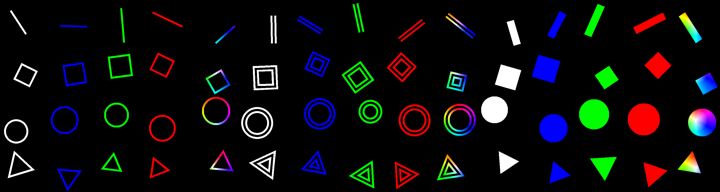

In [434]:
import importlib
import project
importlib.reload(project)
import util as u
importlib.reload(u)
import data as d
importlib.reload(d)

from PIL import Image
import tensorflow as tf
import numpy as np

shapes = d.example_shapes()
shapes = shapes.reshape((4, 15, *shapes.shape[1:]))
u.display_many_images(shapes, color=True)

In [56]:
for i, clss in enumerate(d.all_classes()):
    print(f"{i: >2}", clss)

 0 ('line', 'single', 'white')
 1 ('line', 'single', 'blue')
 2 ('line', 'single', 'green')
 3 ('line', 'single', 'red')
 4 ('line', 'single', 'rainbow')
 5 ('line', 'double', 'white')
 6 ('line', 'double', 'blue')
 7 ('line', 'double', 'green')
 8 ('line', 'double', 'red')
 9 ('line', 'double', 'rainbow')
10 ('line', 'filled', 'white')
11 ('line', 'filled', 'blue')
12 ('line', 'filled', 'green')
13 ('line', 'filled', 'red')
14 ('line', 'filled', 'rainbow')
15 ('square', 'single', 'white')
16 ('square', 'single', 'blue')
17 ('square', 'single', 'green')
18 ('square', 'single', 'red')
19 ('square', 'single', 'rainbow')
20 ('square', 'double', 'white')
21 ('square', 'double', 'blue')
22 ('square', 'double', 'green')
23 ('square', 'double', 'red')
24 ('square', 'double', 'rainbow')
25 ('square', 'filled', 'white')
26 ('square', 'filled', 'blue')
27 ('square', 'filled', 'green')
28 ('square', 'filled', 'red')
29 ('square', 'filled', 'rainbow')
30 ('circle', 'single', 'white')
31 ('circle',

images size:  (5, 20, 48, 48, 3)
combined image size:  (240, 960, 3)


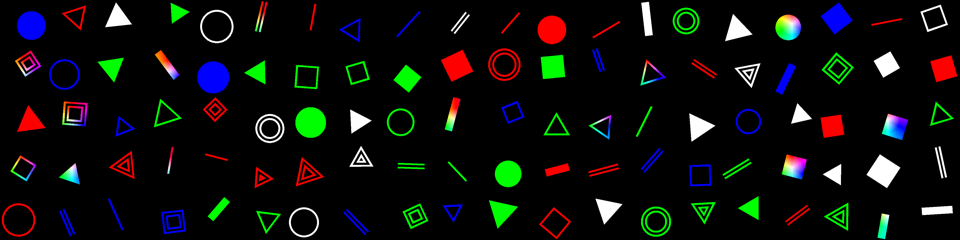

Dataset size: 19200 Train, 2400 Val, 2400 Test


TensorShape([48, 48, 3])

In [2]:
tf.keras.backend.clear_session()
data = project.display_dataset()
print(f"Dataset size: {data['n_train']} Train, {data['n_val']} Val, {data['n_test']} Test")
image_shape = data["x_all"][0].shape
image_shape

In [3]:
classifier = tf.keras.models.load_model("out/classifier2")

In [369]:
classifier = project.train_classifier(data)

Model: "functional_999"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 4)         304       
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 4)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 8)         808       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 16)        3216      
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)       

Epoch 37/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1992 - categorical_accuracy: 0.9197 - val_loss: 0.1946 - val_categorical_accuracy: 0.9172
Epoch 38/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1966 - categorical_accuracy: 0.9234 - val_loss: 0.2444 - val_categorical_accuracy: 0.9065
Epoch 39/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2144 - categorical_accuracy: 0.9175 - val_loss: 0.2367 - val_categorical_accuracy: 0.9112
Epoch 40/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2394 - categorical_accuracy: 0.9081 - val_loss: 0.1852 - val_categorical_accuracy: 0.9190
Epoch 41/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2195 - categorical_accuracy: 0.9103 - val_loss: 0.2340 - val_categorical_accuracy: 0.9083
Epoch 42/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2245 - categorical_accuracy: 0.9094 - val_loss: 0.2266 - val_categorical_accuracy:

Epoch 86/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0291 - categorical_accuracy: 0.9891 - val_loss: 0.0076 - val_categorical_accuracy: 0.9984
Epoch 87/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0455 - categorical_accuracy: 0.9869 - val_loss: 0.0125 - val_categorical_accuracy: 0.9966
Epoch 88/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0183 - categorical_accuracy: 0.9941 - val_loss: 0.0327 - val_categorical_accuracy: 0.9885
Epoch 89/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0443 - categorical_accuracy: 0.9881 - val_loss: 0.0632 - val_categorical_accuracy: 0.9768
Epoch 90/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0542 - categorical_accuracy: 0.9841 - val_loss: 0.0204 - val_categorical_accuracy: 0.9948
Epoch 91/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0972 - categorical_accuracy: 0.9706 - val_loss: 0.2799 - val_categorical_accuracy:

In [376]:
classifier.save("out/classifier2")

INFO:tensorflow:Assets written to: out/classifier2/assets


INFO:tensorflow:Assets written to: out/classifier2/assets


In [370]:
pred_y = classifier(data["x_test"])
print(np.argmax(pred_y, axis=-1))
print(np.argmax(data["y_test"], axis=-1))
n_correct = np.count_nonzero(np.equal(np.argmax(data["y_test"], axis=-1), np.argmax(pred_y, axis=-1)))
print(f"Accuracy {n_correct}/{data['n_test']} = {n_correct/data['n_test']}")

[41 48 55 ... 39 42 52]
[41 48 55 ... 39 42 52]
Accuracy 2336/2400 = 0.9733333333333334


Layer 0 : input_3
Layer 0 shape (None, 48, 48, 3)
Layer 1 : conv2d_10
Layer 1 shape (None, 48, 48, 4)
Layer 2 : average_pooling2d
Layer 2 shape (None, 24, 24, 4)
Layer 3 : conv2d_11
Layer 3 shape (None, 24, 24, 8)
Layer 4 : average_pooling2d_1
Layer 4 shape (None, 12, 12, 8)
Layer 5 : conv2d_12
Layer 5 shape (None, 12, 12, 16)
Layer 6 : average_pooling2d_2
Layer 6 shape (None, 6, 6, 16)
Layer 7 : conv2d_13
Layer 7 shape (None, 6, 6, 32)
Layer 8 : average_pooling2d_3
Layer 8 shape (None, 3, 3, 32)
Layer 9 : conv2d_14
Layer 9 shape (None, 3, 3, 64)
Layer 10 : flatten_1
Layer 10 shape (None, 576)
Layer 11 : dense_3
Layer 11 shape (None, 60)
Layer 12 : dense_4
Layer 12 shape (None, 60)
Layer 13 : softmax
Layer 13 shape (None, 60)

Neuron
Tensor("strided_slice_498:0", shape=(), dtype=float32)
Channel
Tensor("strided_slice_499:0", shape=(24, 24), dtype=float32)

Image


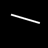


Activation of neuron [3, 1, 1, 0]
tf.Tensor(0.0, shape=(), dtype=float32)


In [371]:
rev_model = project.layer_stuff(classifier, data)

Step 1


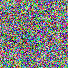

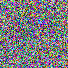

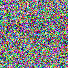

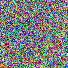

Step 2


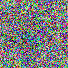

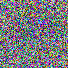

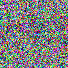

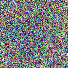

Step 4


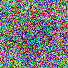

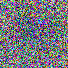

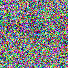

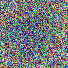

Step 8


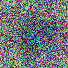

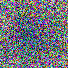

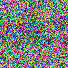

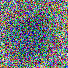

Step 16


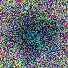

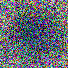

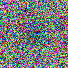

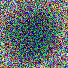

Step 32


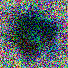

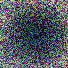

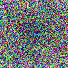

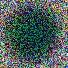

Step 64


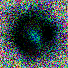

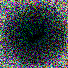

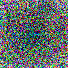

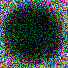

Step 128


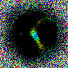

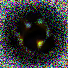

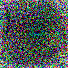

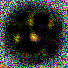

Step 256


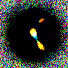

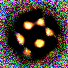

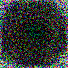

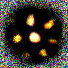

Step 512


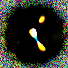

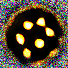

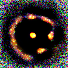

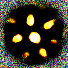

Step 1024


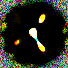

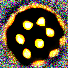

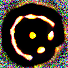

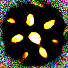

In [387]:
t = 0

line_model = project.reverse_model(classifier, [12, 0 + t], "dense_neuron")
rect_model = project.reverse_model(classifier, [12, 15 + t], "dense_neuron")
circle_model = project.reverse_model(classifier, [12, 30 + t], "dense_neuron")
triangle_model = project.reverse_model(classifier, [12, 45 + t], "dense_neuron")

options = ["translate", "rotate", "clip"]
# options = ["clip"]
vizzes = zip(
    project.viz_by_opt(line_model, options),
    project.viz_by_opt(rect_model, options),
    project.viz_by_opt(circle_model, options),
    project.viz_by_opt(triangle_model, options),
)

powers = [2 ** i for i in range(20)]
for i, imgs in enumerate(vizzes):
    if i in powers:
        print("Step", i)
        for img in imgs:
            u.display_float32_image(img, color=True)

Step 1


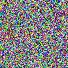

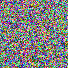

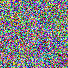

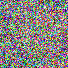

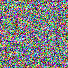

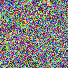

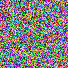

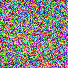

Step 2


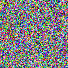

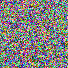

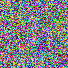

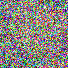

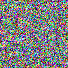

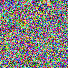

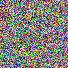

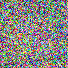

Step 4


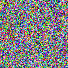

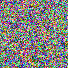

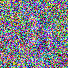

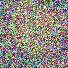

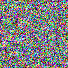

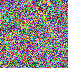

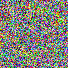

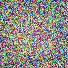

Step 8


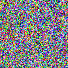

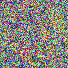

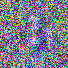

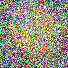

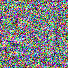

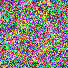

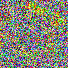

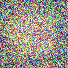

Step 16


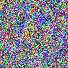

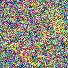

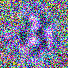

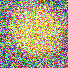

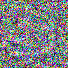

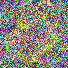

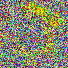

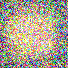

Step 32


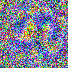

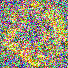

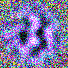

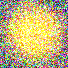

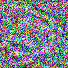

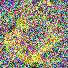

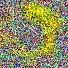

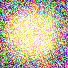

Step 64


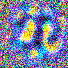

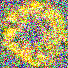

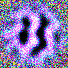

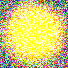

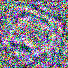

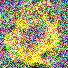

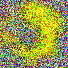

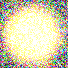

Step 128


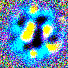

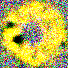

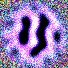

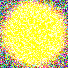

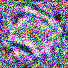

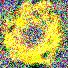

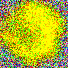

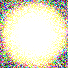

Step 256


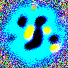

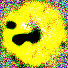

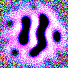

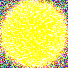

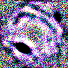

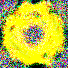

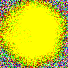

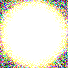

Step 512


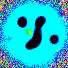

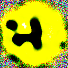

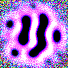

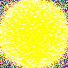

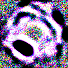

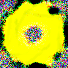

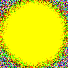

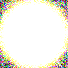

Step 1024


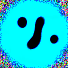

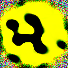

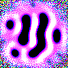

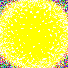

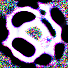

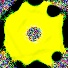

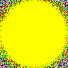

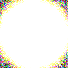

In [388]:
models = [
    project.reverse_model(classifier, [3, i], "conv_channel") for i in range(8)
]

options = ["translate", "rotate", "clip"]
# options = ["clip"]
vizzes = zip(*[
    project.viz_by_opt(m, options) for m in models
])

powers = [2 ** i for i in range(20)]
for i, imgs in enumerate(vizzes):
    if i in powers:
        print("Step", i)
        for img in imgs:
            u.display_float32_image(img, color=True)

In [4]:
autoencoder = tf.keras.models.load_model("out/autoenc2")
encoder = tf.keras.models.load_model("out/autoenc_enc2")
decoder = tf.keras.models.load_model("out/autoenc_dec2")

In [41]:
autoencoder, encoder, decoder = project.train_autoencoder(data)

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)        

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0056
Epoch 42/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 43/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0041
Epoch 44/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0044
Epoch 45/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0040
Epoch 46/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 47/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0040
Epoch 48/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 49/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0037
Epoch 50/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 51/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 52/100
1000/1000 [==============================] - 8s 8ms/step - loss: 

images size:  (4, 15, 48, 48, 3)
combined image size:  (192, 720, 3)


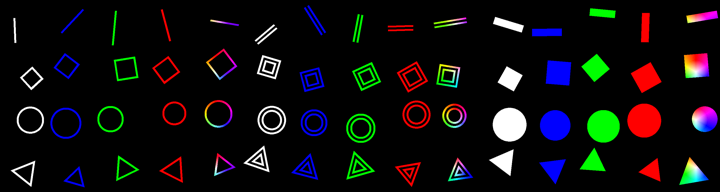

images size:  (4, 15, 48, 48, 3)
combined image size:  (192, 720, 3)


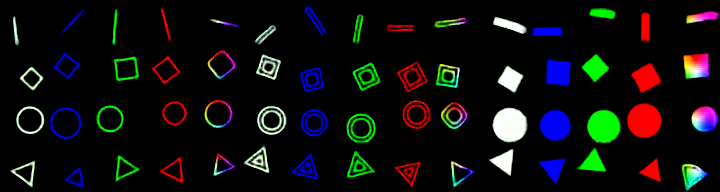

In [446]:
shapes = d.example_shapes()
u.display_model_output(shapes, autoencoder, color=True)

In [43]:
autoencoder.save("out/autoenc2")
encoder.save("out/autoenc_enc2")
decoder.save("out/autoenc_dec2")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: out/autoenc2/assets


INFO:tensorflow:Assets written to: out/autoenc2/assets


images size:  (4, 4, 4, 4, 4, 4, 48, 48, 3)
combined image size:  (3072, 3072, 3)


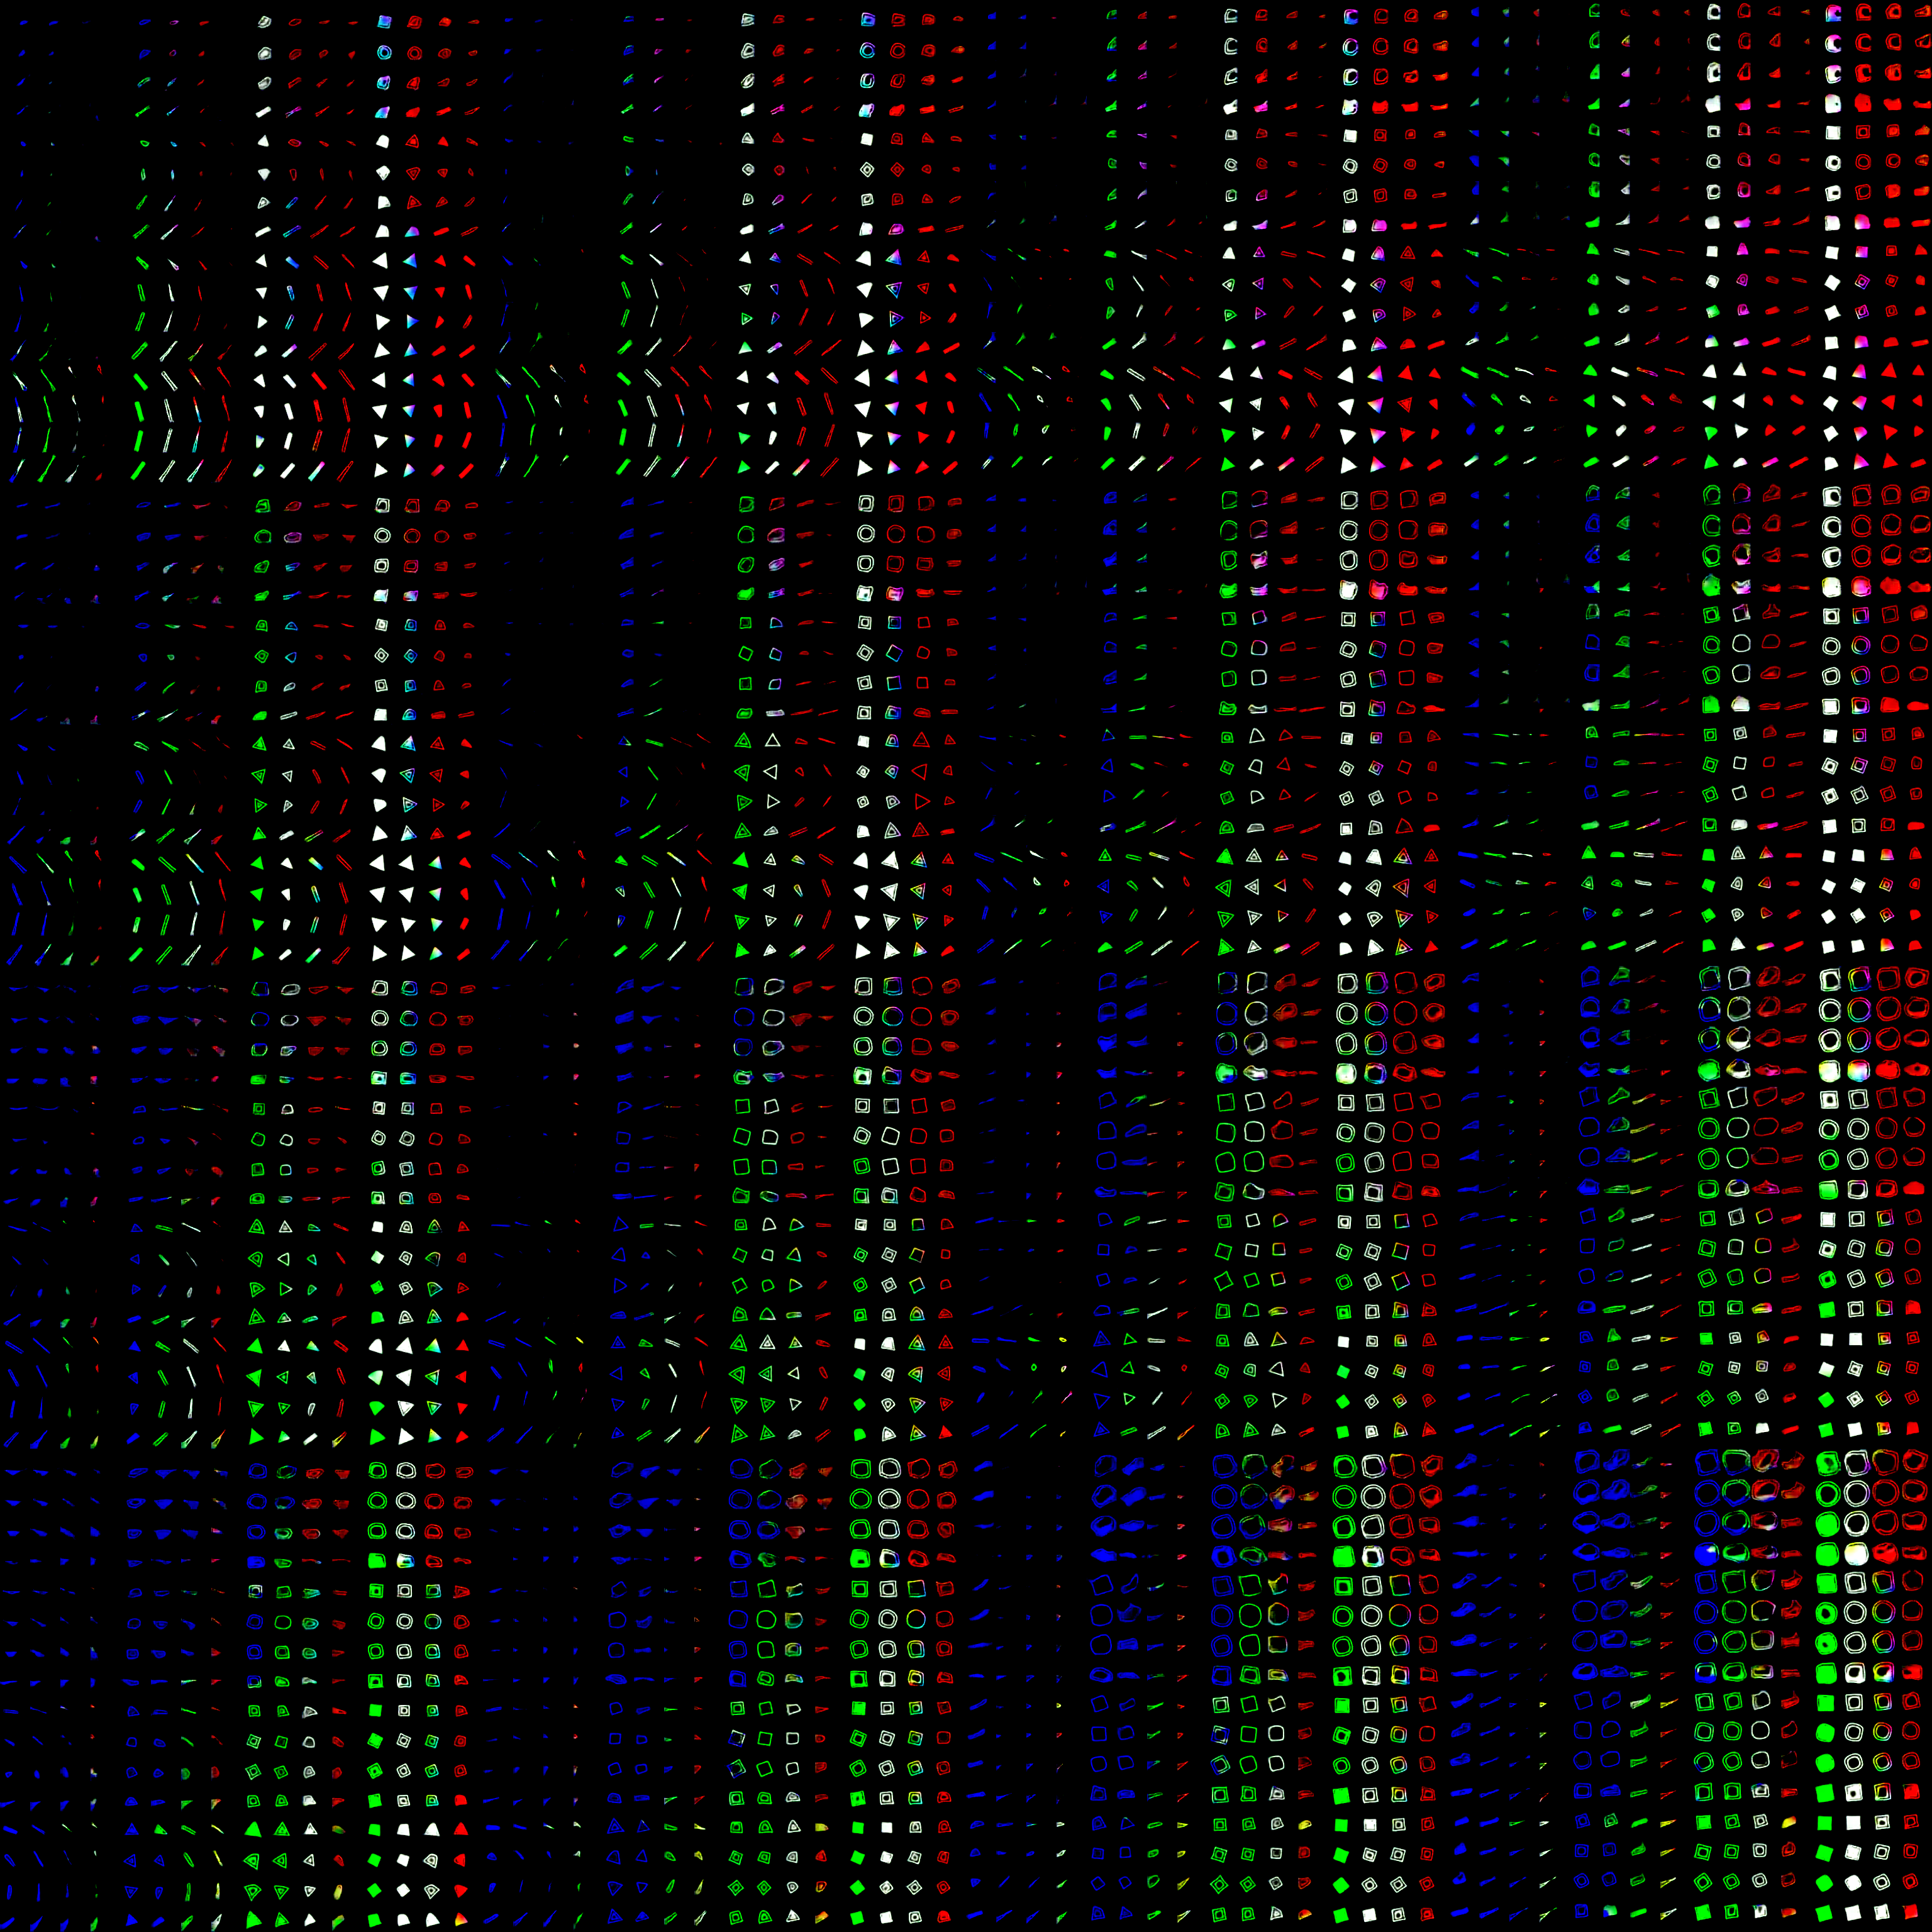

In [97]:
u.display_latent_dims(decoder, latent_dims=6, range=[-4, 4], n_vecs=4, color=True)

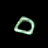

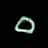

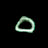

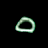

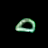

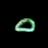

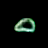

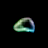

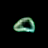

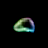

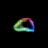

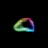

In [424]:
# square double rainbow
rev_model = project.reverse_model(classifier, [13, 24], "dense_neuron")

# rev_model = project.reverse_model(classifier, [0, 0], "conv_channel")

image_parameterization = tf.random.uniform([1, 6], -1, 1)

steps = [2**i for i in range(20)]
u.display_float32_image(decoder(image_parameterization), color=True)
for i, img in enumerate(project.viz_loop2(image_parameterization, decoder, rev_model, steps=2048)):
    if i in steps:
#         print("Step", i)
#         print(img.numpy())
#         print("grad", grad.numpy())
#         print("grad norm", tf.norm(grad).numpy())
#         print("class", np.argmax(classifier(decoder(img))))
        u.display_float32_image(decoder(img), color=True)

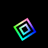

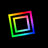

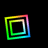

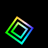

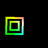

In [407]:
# square double rainbow
target_class = 24

# first example image from target class
example = data["x_all"][np.where(np.argmax(data["y_all"], axis=-1) == target_class)[0][0]]
u.display_float32_image(example, color=True)

# just optimize for red image
# rev_model = project.reverse_model(classifier, [0, 0], "conv_channel", batch=True)

rev_model = project.reverse_model(classifier, [12, target_class], "dense_neuron", batch=True)

display()

indices = np.random.permutation(data["n_all"])[:1000]
search_images = tf.gather(data["x_all"], indices)
losses, idx = project.viz_search(search_images, rev_model)
best_imgs = tf.gather(search_images, idx)
for img in best_imgs:
    u.display_float32_image(img, color=True)

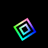

Top 4 "most double rainbow square" latent vectors across 10000 samples.
tf.Tensor(
[[ 3.4378052e-02  1.0603409e+00  5.3567390e+00  3.9822941e+00
   3.1079750e+00  2.7996521e+00]
 [-2.3530006e-01  1.9708042e+00  5.6101084e+00  2.8545971e+00
   4.4488907e-03  2.5219393e+00]
 [-1.2508087e+00  6.4808369e-01  6.5954933e+00  2.0935726e+00
  -1.9623013e+00  2.6326132e+00]
 [-7.3566103e+00 -8.1572533e-01  5.7588816e+00 -1.0566635e+00
   1.6511106e+00  1.6319990e+00]], shape=(4, 6), dtype=float32)


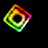

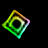

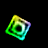

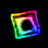

In [415]:
# square double rainbow
target_class = 24

# first example image from target class
example = data["x_all"][np.where(np.argmax(data["y_all"], axis=-1) == target_class)[0][0]]
u.display_float32_image(example, color=True)

search_points = tf.random.uniform([10000, 6], -10, 10)

# just optimize for red image
# rev_model = project.reverse_model(classifier, [0, 0], "conv_channel", batch=True)

# square double rainbow
rev_model = project.reverse_model(classifier, [12, target_class], "dense_neuron", batch=True)

losses, idx = project.viz_search2(search_points, decoder, rev_model)
best = tf.gather(search_points, idx)
best_imgs = decoder(best)
print("Top 4 \"most double rainbow square\" latent vectors across 10000 samples.")
print(best)
for img in best_imgs:
    u.display_float32_image(img, color=True)
